#### import all the required library/packages 

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

### Common Function

In [2]:
### This function Plot Box Plot and Distplot
def plotBoxPlot_And_DistPlot(dataset,feature):
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    plt.title(f"{feature}")
    sns.boxplot(dataset[feature],color="red")
    
    plt.subplot(2,2,2)
    plt.title(f"{feature}")
    sns.distplot(dataset[feature],color="red",hist=False)
    
    plt.show()

In [3]:
### This function Plot Box Plot and Distplot But this we will use after the adjustment of Outliers and Will compare the Before And After graph/plot
def Compare_Before_After_BoxPlot(Original_DF,New_DF,feature):
    plt.figure(figsize=(25,12))
    plt.subplot(2,2,1)
    plt.title(f"With Outliers in {feature}")
    sns.boxplot(Original_DF[feature],color="red")
    
    plt.subplot(2,2,2)
    plt.title(f"With Outliers in {feature}")
    sns.distplot(Original_DF[feature],color="red")
    
    plt.subplot(2,2,3)
    plt.title(f"Without Outliers in {feature}")
    sns.boxplot(New_DF[feature],color="green")
    
    
    plt.subplot(2,2,4)
    plt.title(f"Without Outliers in {feature}")
    sns.distplot(New_DF[feature],color="green")
    
    plt.show()

In [4]:
### This function Is use to Calculate/find out the Ouliers Limit and it will return the IQR_75% ,IQR_25% ,IQR ,Upper Limit And Lower Limit details of Outlier
### The values/output will returns in DataFrame format
def calculate_IQR75_25IQR_IQR(data_DF,feature):
    percentile75 = data_DF[feature].quantile(0.75)
    percentile25 = data_DF[feature].quantile(0.25)
    IQR = percentile75 - percentile25
    Upper_Limit = percentile75 + 1.5 * IQR
    Lower_Limit = percentile25 - 1.5 * IQR
    data_dict = {"percentile75" :percentile75,
                 "percentile25" :percentile25,
                 "IQR" :IQR,
                 "UpperLimit" :Upper_Limit,
                 "LowerLimit":Lower_Limit}
    return pd.DataFrame(data_dict,index=[0])

In [5]:
## This function is basically we used to adjust the outliers once the Find out the Outlier and Its Upper and Lower Limit
def capping_Outliers(data_df,feature,IQR_Data):
    data_df[feature] = np.where(
        data_df[feature] > IQR_Data['UpperLimit'][0],
        IQR_Data['UpperLimit'][0],
        np.where(
            data_df[feature] < IQR_Data['LowerLimit'][0],
            IQR_Data['LowerLimit'][0],
            data_df[feature]            
        )
    )    

In [6]:
## To Find/check the Value Counts for Categorical Features
def ValueCount(Data_df,feature,normalize=False):
    return Data_df[feature].value_counts(normalize=normalize)

In [7]:
def printIQRinfo(Data_df,feature):
    print(f"Percentile_75_{feature}:",Data_df["percentile75"][0])
    print(f"Percentile_25_{feature}:",Data_df["percentile25"][0])
    print(f"Percentile_IQR_{feature}:",Data_df["IQR"][0])
    print(f"UpperLimit_{feature}:",Data_df["UpperLimit"][0])
    print(f"LowerLimit_{feature}:",Data_df["LowerLimit"][0])

In [8]:
data = pd.read_csv('bollywood.csv')
original_bollwod_data = data.copy()

In [9]:
original_bollwod_data['Genre'].value_counts()

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: Genre, dtype: int64

In [10]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
data.sample()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
36,37,6-Jun-14,Holiday,HS,Action,50,129.0,6841635,14182,1997


### EDA

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [12]:
data['Genre'] = data['Genre'].str.strip()
data['Release Date'] = pd.to_datetime(data['Release Date'])

In [13]:
data.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,2014-04-18,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,2013-01-04,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,2014-07-18,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,2013-01-04,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,2014-07-04,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
5,6,2014-05-30,Citylights,HS,Drama,7,35.00,1076591,1806,84
6,7,2014-09-19,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373
7,8,2013-01-11,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647
8,9,2014-01-10,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591
9,10,2013-01-11,Gangoobai,N,Drama,2,0.01,4354,1,1


### Check for Duplicate data

In [14]:
duplicate = data[data.duplicated()]
duplicate

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes


##### From above reference Here in the data set we don't have any duplicate datapoints

# Check For Null/Missing Values

In [15]:
data.isnull().sum()

SlNo                   0
Release Date           0
MovieName              0
ReleaseTime            0
Genre                  0
Budget                 0
BoxOfficeCollection    0
YoutubeViews           0
YoutubeLikes           0
YoutubeDislikes        0
dtype: int64

In [16]:
data.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


##### From above reference we dont have missing values in out data set 

##### Lets plot the graph using all the features and analyze

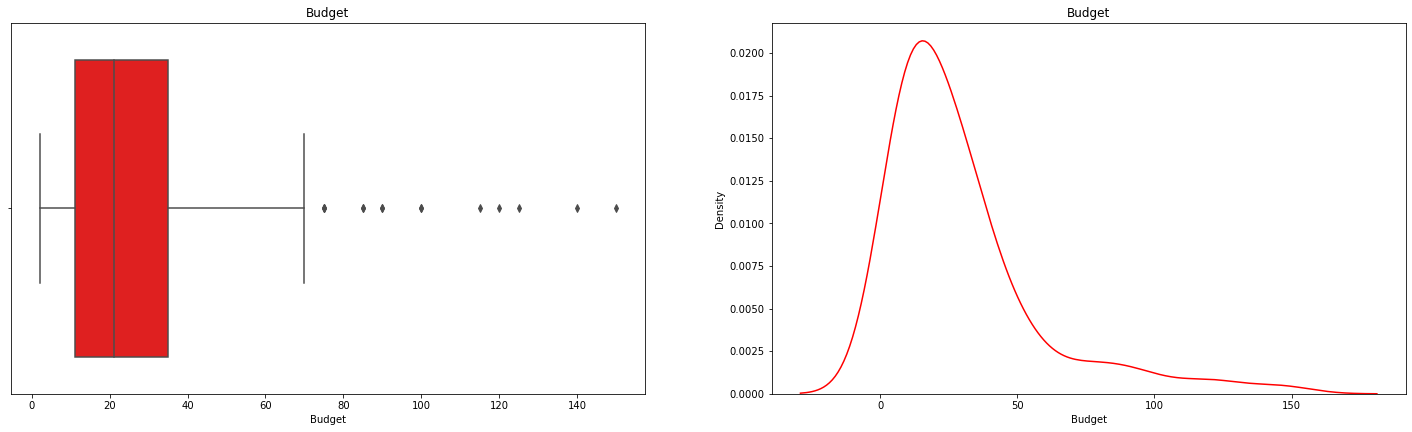

In [17]:
plotBoxPlot_And_DistPlot(data,'Budget')

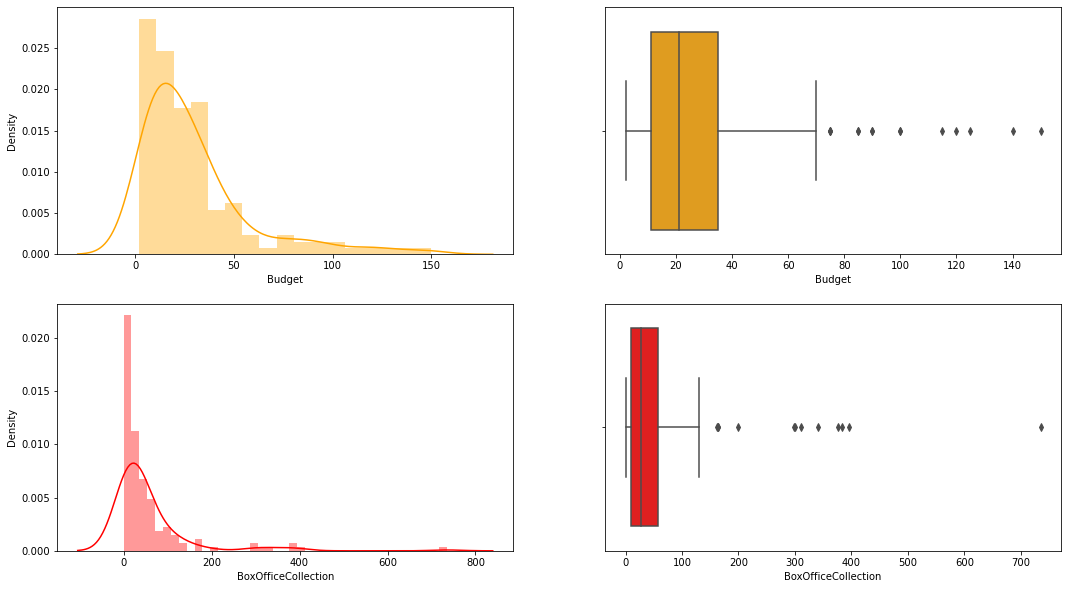

In [18]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(data['Budget'],hist=True,color='orange')

plt.subplot(2,2,2)
sns.boxplot(data['Budget'],color='orange')

plt.subplot(2,2,3)
sns.distplot(data['BoxOfficeCollection'] ,hist=True,color='red')

plt.subplot(2,2,4)
sns.boxplot(data['BoxOfficeCollection'],color='red')

plt.show()

#### From above refernce 
   ##### 1. Box plot (Budget feature) we can see that , there are outliear
   ##### 2. Box plot (BoxOfficeCollection feature) we can see that , there are outliear
    

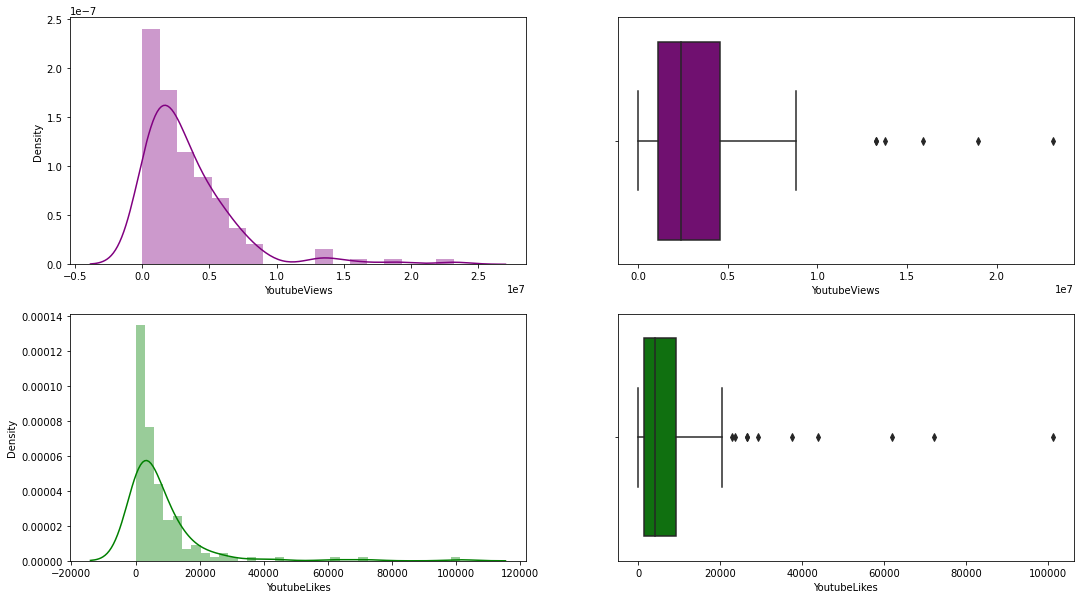

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(data['YoutubeViews'],hist=True,color='purple')

plt.subplot(2,2,2)
sns.boxplot(data['YoutubeViews'],color='purple')

plt.subplot(2,2,3)
sns.distplot(data['YoutubeLikes'],hist=True,color='green')

plt.subplot(2,2,4)
sns.boxplot(data['YoutubeLikes'],color='green')

plt.show()

### From above refernce 
   ##### 1. Box plot (YoutubeViews feature) we can see that , there are outliear
   ##### 2. Box plot (YoutubeLikes feature) we can see that , there are outliear

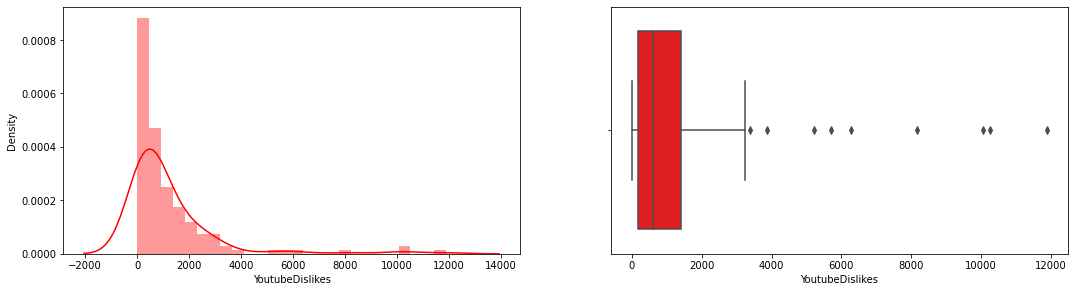

In [20]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(data['YoutubeDislikes'],hist=True,color='red')

plt.subplot(2,2,2)
sns.boxplot(data['YoutubeDislikes'],color='red')
plt.show()

### From above refernce 
   ###### 1. Box plot (YoutubeDislikes feature) we can see that , there are outliear

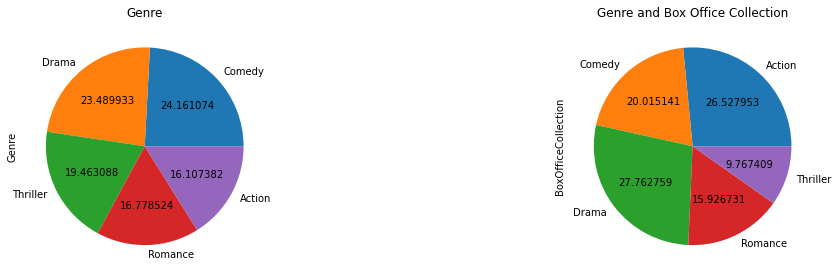

In [21]:
data['year'] =  data['Release Date'].dt.year
plt.figure(figsize=(18,10))
#plt.subplot(2,2,1)
#plt.title('Genre and Release Year')
#data[['year','Genre']].value_counts().plot(kind='pie',autopct='%2f')


plt.subplot(2,2,1)
plt.title("Genre")
data['Genre'].value_counts().plot(kind='pie',autopct='%2f')

plt.subplot(2,2,2)
plt.title('Genre and Box Office Collection')
data.groupby(['Genre'])['BoxOfficeCollection'].sum().plot(kind='pie',autopct='%2f')

plt.show()

### From above Pie Chart : Genre
##### 1. Here we can see till now how many different genre movies released or produced.

#### From above Pie Chart : Genre and Box Office Collection
##### here we can see the box office collection till now as per Genre

<AxesSubplot:ylabel='None'>

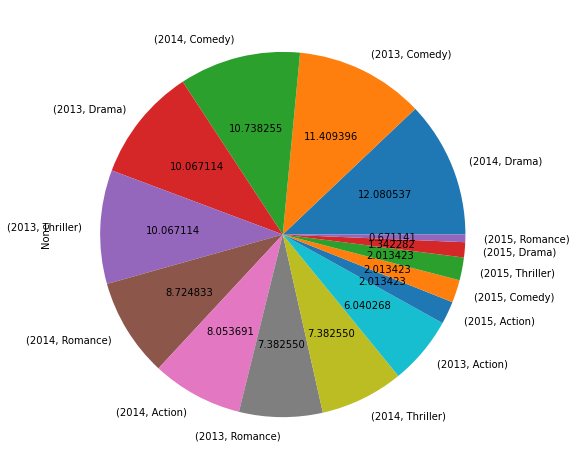

In [22]:
plt.figure(figsize=(18,25))
plt.subplot(2,2,1)
data[['year','Genre']].value_counts().plot(kind='pie',autopct='%2f')

In [23]:
data["Release_year"] = data["Release Date"].dt.year
data["Release_month"] = data["Release Date"].dt.month
data['Release_day'] = data['Release Date'].dt.day_name()
data['Timestamp'] = data['Release Date'].dt.dayofweek

<AxesSubplot:ylabel='Release_month'>

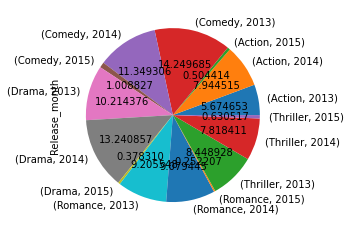

In [24]:
data.groupby(['Genre','Release_year'])['Release_month'].sum().plot(kind="pie",autopct="%2f")

In [25]:
pd.DataFrame(ValueCount(data,'Genre',False))

,Genre
Comedy,36
Drama,35
Thriller,29
Romance,25
Action,24


###### From above data we can see in majority the Genre (Comedy and Drama) of movies was produced  and release

<AxesSubplot:xlabel='Genre,Release_year'>

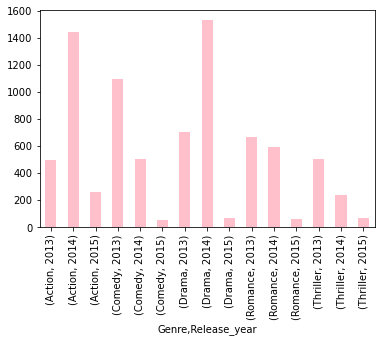

In [26]:
data.groupby(['Genre','Release_year'])['BoxOfficeCollection'].sum().plot(kind="bar",color="pink")

###### From above Bar Graph we can check the BoxOffice Collection as per Genre and Release Year

In [27]:
data.groupby(['Genre'])['BoxOfficeCollection'].sum()

Genre
Action      2200.34
Comedy      1660.14
Drama       2302.76
Romance     1321.03
Thriller     810.15
Name: BoxOfficeCollection, dtype: float64

In [28]:
data.groupby(['Genre','Release_day'])['BoxOfficeCollection'].count()

Genre     Release_day
Action    Friday         23
          Thursday        1
Comedy    Friday         35
          Wednesday       1
Drama     Friday         33
          Thursday        1
          Wednesday       1
Romance   Friday         25
Thriller  Friday         28
          Thursday        1
Name: BoxOfficeCollection, dtype: int64

#### From above Result we can say that the Movies was released on Wednesday,Thrusday,Friday.
###### 1.In Majority the movies was released in Friday.(May be this is the last day of week day and then Weekends start)
###### 2.Only 1 or 2 Movies was released in Wednesday and Thrusday.
###### 3.As per the data we can say the Release day did impact on Box Office Collection.


In [29]:
data.groupby(['Genre','ReleaseTime'])['BoxOfficeCollection'].count()

Genre     ReleaseTime
Action    FS              3
          HS              3
          LW              3
          N              15
Comedy    FS              3
          HS              5
          LW              5
          N              23
Drama     FS              4
          HS              6
          LW              1
          N              24
Romance   FS              3
          HS              3
          LW              4
          N              15
Thriller  FS              4
          HS              1
          LW              2
          N              22
Name: BoxOfficeCollection, dtype: int64

In [30]:
#We have 4 different types of release time
data['ReleaseTime'].value_counts()

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64

### Lets check the skewness of all features

In [31]:
print("Budget Skew Value :",data['Budget'].skew())
print("BoxOfficeCollection Skew Value :",data['BoxOfficeCollection'].skew())
print("YoutubeViews Skew Value :",data['YoutubeViews'].skew())
print("YoutubeLikes Skew Value :",data['YoutubeLikes'].skew())
print("YoutubeDislikes Skew Value :",data['YoutubeDislikes'].skew())

Budget Skew Value : 2.0595599453916424
BoxOfficeCollection Skew Value : 3.9808798721678493
YoutubeViews Skew Value : 2.667001686521696
YoutubeLikes Skew Value : 4.391137943019079
YoutubeDislikes Skew Value : 3.5349625518127534


#### Let's Adjust the Outliers using Capping tech.  

### Data Pre-Processing

#### 1.Budget

#### Find the IQR For Budget

In [32]:
IQR_Info_Budget =calculate_IQR75_25IQR_IQR(data,'Budget')
IQR_Info_Budget

,percentile75,percentile25,IQR,UpperLimit,LowerLimit
0,35.0,11.0,24.0,71.0,-25.0


In [33]:
printIQRinfo(IQR_Info_Budget,"Budget")

Percentile_75_Budget: 35.0
Percentile_25_Budget: 11.0
Percentile_IQR_Budget: 24.0
UpperLimit_Budget: 71.0
LowerLimit_Budget: -25.0


# Finding Outliers (Upper Limit and Lower Limit) for Budgets

In [34]:
data[data['Budget'] > IQR_Info_Budget["UpperLimit"][0]]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,year,Release_year,Release_month,Release_day,Timestamp
26,27,2014-10-24,Happy New Year,LW,Drama,125,383.00,6395202,37585,10269,2014,2014,10,Friday,4
39,40,2014-06-20,Humshakals,HS,Comedy,75,63.70,6280868,1,1,2014,2014,6,Friday,4
41,42,2014-01-24,Jai Ho,N,Action,120,111.00,868743,2783,404,2014,2014,1,Friday,4
43,44,2014-07-25,Kick,N,Action,100,377.00,18986221,101275,10066,2014,2014,7,Friday,4
78,79,2014-08-15,Singham Returns,LW,Action,90,200.00,8287587,20011,2899,2014,2014,8,Friday,4
89,90,2014-12-19,PK,HS,Drama,85,735.00,13270623,43767,5693,2014,2014,12,Friday,4
91,92,2014-12-05,Action Jackson,N,Action,90,57.45,13279636,19240,3859,2014,2014,12,Friday,4
92,93,2014-10-02,Bang Bang,FS,Action,140,340.00,15889811,61805,6283,2014,2014,10,Thursday,3
96,97,2013-10-02,Besharam,LW,Comedy,85,35.00,5319606,10253,8165,2013,2013,10,Wednesday,2
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.00,1882346,7954,1593,2013,2013,8,Friday,4


In [35]:
data[data['Budget'] < IQR_Info_Budget["LowerLimit"][0]]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,year,Release_year,Release_month,Release_day,Timestamp


##### Here in above observations we have lots of Outliers in Upper Limit and
#### And don't have outliers in lower Limit

#### Now Adjust Upper Limit outliers for Budget

In [36]:
capping_Outliers(data,'Budget',IQR_Info_Budget)

#### Compare the data Before and After.After adjustment of Outlier

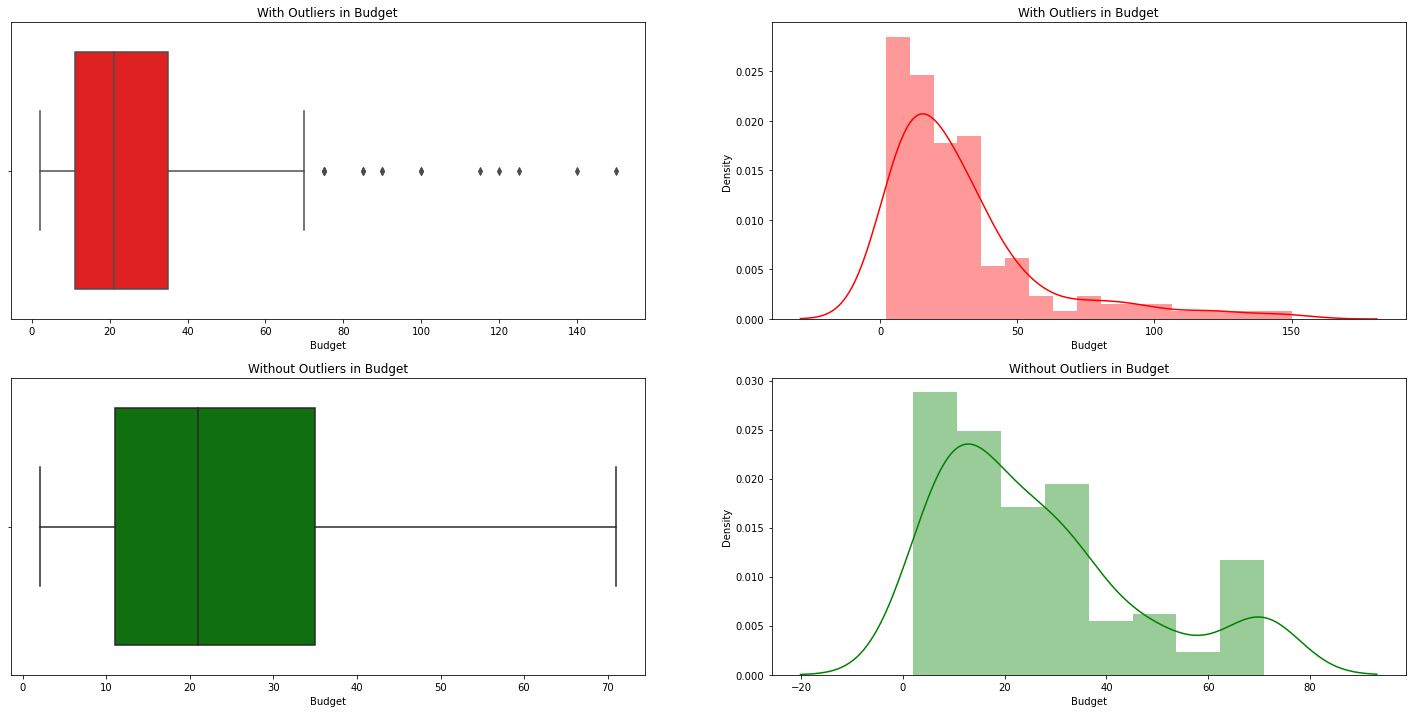

In [37]:
Compare_Before_After_BoxPlot(original_bollwod_data,data,'Budget')

#### From above observation we can say that we don't have outliers not in "Budget" feature

#### Let's Plot the Budget features using distplot. and observe and compare the grap  with and without outliers 

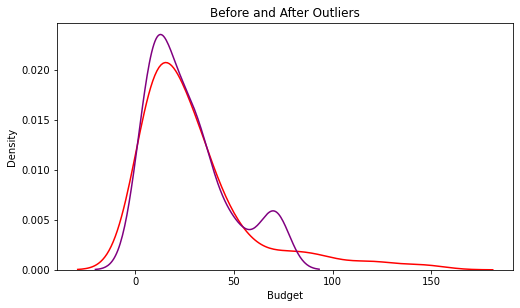

In [38]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('Before and After Outliers')
sns.distplot(original_bollwod_data['Budget'],hist=False,color='red') # Before
sns.distplot(data['Budget'],hist=False,color='purple') # After
plt.show()

In [39]:
print('Before Skewness of Budget:',original_bollwod_data['Budget'].skew())

print('---------------------------')
print('----------Before-----------')
print(data['Budget'].describe())

print('-----------------')
print('After Skewness of Budget:',data['Budget'].skew())

print('---------------------------')
print('----------After------------')
print(original_bollwod_data['Budget'].describe())

Before Skewness of Budget: 2.0595599453916424
---------------------------
----------Before-----------
count    149.000000
mean      26.550336
std       20.108636
min        2.000000
25%       11.000000
50%       21.000000
75%       35.000000
max       71.000000
Name: Budget, dtype: float64
-----------------
After Skewness of Budget: 0.9945008166578978
---------------------------
----------After------------
count    149.000000
mean      29.442953
std       28.237981
min        2.000000
25%       11.000000
50%       21.000000
75%       35.000000
max      150.000000
Name: Budget, dtype: float64


#  Find the IQR for BoxOfficeCollection (BOC)

In [40]:
IQR_Info_BOC = calculate_IQR75_25IQR_IQR(data,'BoxOfficeCollection')

In [41]:
printIQRinfo(IQR_Info_BOC,'BoxOfficeCollection')

Percentile_75_BoxOfficeCollection: 57.45
Percentile_25_BoxOfficeCollection: 8.78
Percentile_IQR_BoxOfficeCollection: 48.67
UpperLimit_BoxOfficeCollection: 130.45499999999998
LowerLimit_BoxOfficeCollection: -64.225


# Finding Outliers (Upper Limit and Lower Limit) for BoxOfficeCollection

In [42]:
data[data['BoxOfficeCollection'] > IQR_Info_BOC["UpperLimit"][0]]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,year,Release_year,Release_month,Release_day,Timestamp
14,15,2014-08-08,Entertainment,N,Comedy,60.0,163.0,6336058,20472,2843,2014,2014,8,Friday,4
16,17,2013-01-25,Race 2,LW,Thriller,60.0,162.0,7641333,12617,2138,2013,2013,1,Friday,4
26,27,2014-10-24,Happy New Year,LW,Drama,71.0,383.0,6395202,37585,10269,2014,2014,10,Friday,4
43,44,2014-07-25,Kick,N,Action,71.0,377.0,18986221,101275,10066,2014,2014,7,Friday,4
78,79,2014-08-15,Singham Returns,LW,Action,71.0,200.0,8287587,20011,2899,2014,2014,8,Friday,4
82,83,2013-05-31,Yeh Jawaani Hai Deewani,N,Romance,70.0,311.0,5123217,13826,1640,2013,2013,5,Friday,4
89,90,2014-12-19,PK,HS,Drama,71.0,735.0,13270623,43767,5693,2014,2014,12,Friday,4
92,93,2014-10-02,Bang Bang,FS,Action,71.0,340.0,15889811,61805,6283,2014,2014,10,Thursday,3
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30.0,164.0,2635390,4622,456,2013,2013,7,Friday,4
115,116,2013-08-09,Chennai Express,FS,Comedy,71.0,395.0,1882346,7954,1593,2013,2013,8,Friday,4


In [43]:
data[data['BoxOfficeCollection'] < IQR_Info_BOC["LowerLimit"][0]]

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,year,Release_year,Release_month,Release_day,Timestamp


##### 1. Here in above observations we have lots of Outliers in Upper Limit and
##### 2. don't have outliers in lower Limit
##### 3. Here in next Step we will adjust the outliers

In [44]:
capping_Outliers(data,'BoxOfficeCollection',IQR_Info_BOC)

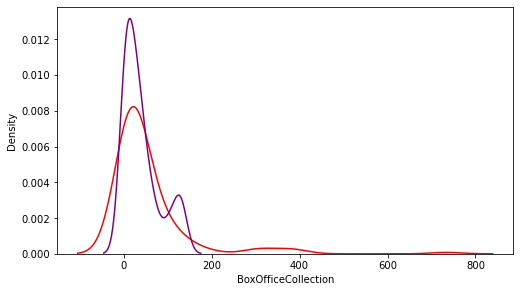

In [45]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(original_bollwod_data['BoxOfficeCollection'],hist=False,color='red') # Before
sns.distplot(data['BoxOfficeCollection'],hist=False,color='purple') # After
plt.show()

#### Find IQR From Youtube Views

In [46]:
IQR_Info_YTV=calculate_IQR75_25IQR_IQR(data,'YoutubeViews')
IQR_Info_YTV

,percentile75,percentile25,IQR,UpperLimit,LowerLimit
0,4550051.0,1076591.0,3473460.0,9760241.0,-4133599.0


In [47]:
printIQRinfo(IQR_Info_YTV,'YoutubeViews')

Percentile_75_YoutubeViews: 4550051.0
Percentile_25_YoutubeViews: 1076591.0
Percentile_IQR_YoutubeViews: 3473460.0
UpperLimit_YoutubeViews: 9760241.0
LowerLimit_YoutubeViews: -4133599.0


####  Adjustment of Outliers 

In [48]:
capping_Outliers(data,'YoutubeViews',IQR_Info_YTV)

#### Comparing the data/data distribustion after adjustment of outlies 

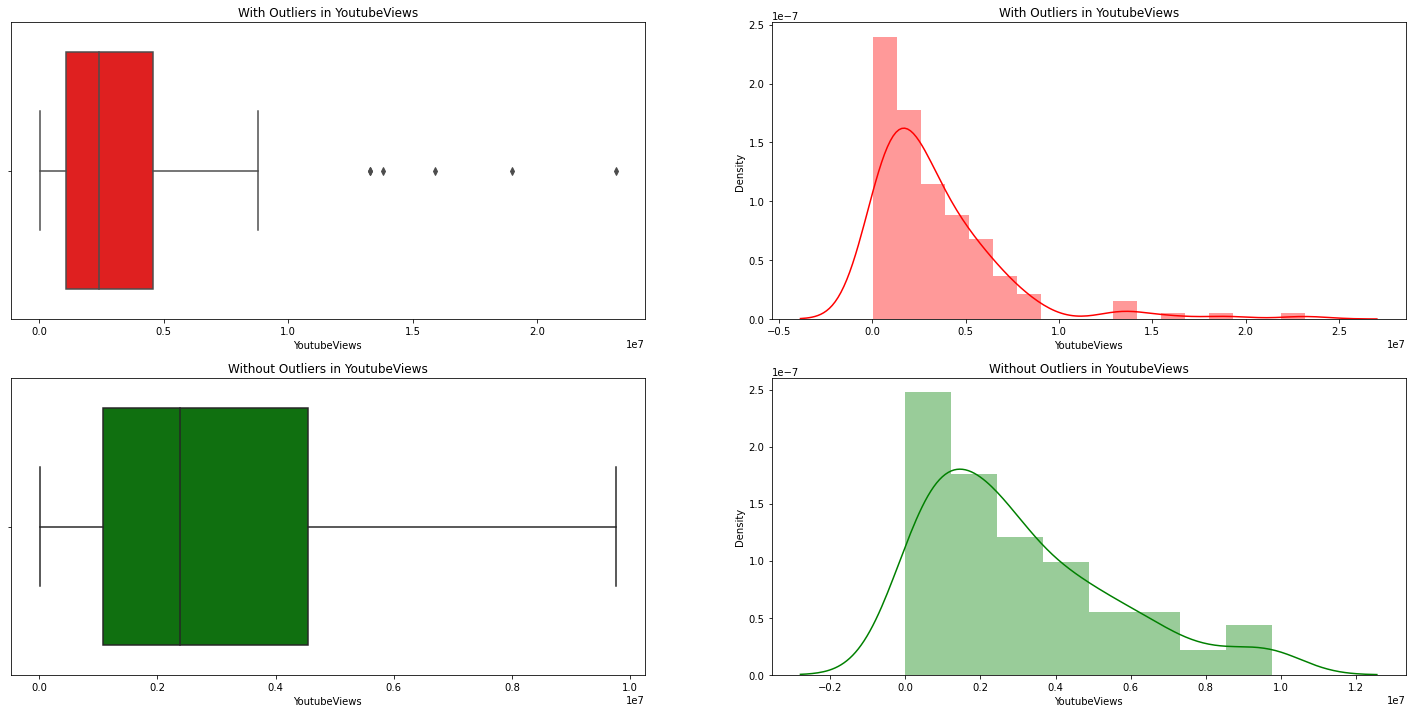

In [49]:
Compare_Before_After_BoxPlot(original_bollwod_data,data,'YoutubeViews')

#### Find IQR For Youtube Likes

In [50]:
IQR_Info_YTL = calculate_IQR75_25IQR_IQR(data,'YoutubeLikes')

In [51]:
printIQRinfo(IQR_Info_YTL,'YoutubeLikes')

Percentile_75_YoutubeLikes: 9100.0
Percentile_25_YoutubeLikes: 1377.0
Percentile_IQR_YoutubeLikes: 7723.0
UpperLimit_YoutubeLikes: 20684.5
LowerLimit_YoutubeLikes: -10207.5


#### Adjustment Of Outliers 

In [52]:
capping_Outliers(data,'YoutubeLikes',IQR_Info_YTL)

### Comparing the data/data distribustion after adjustment of outlies 

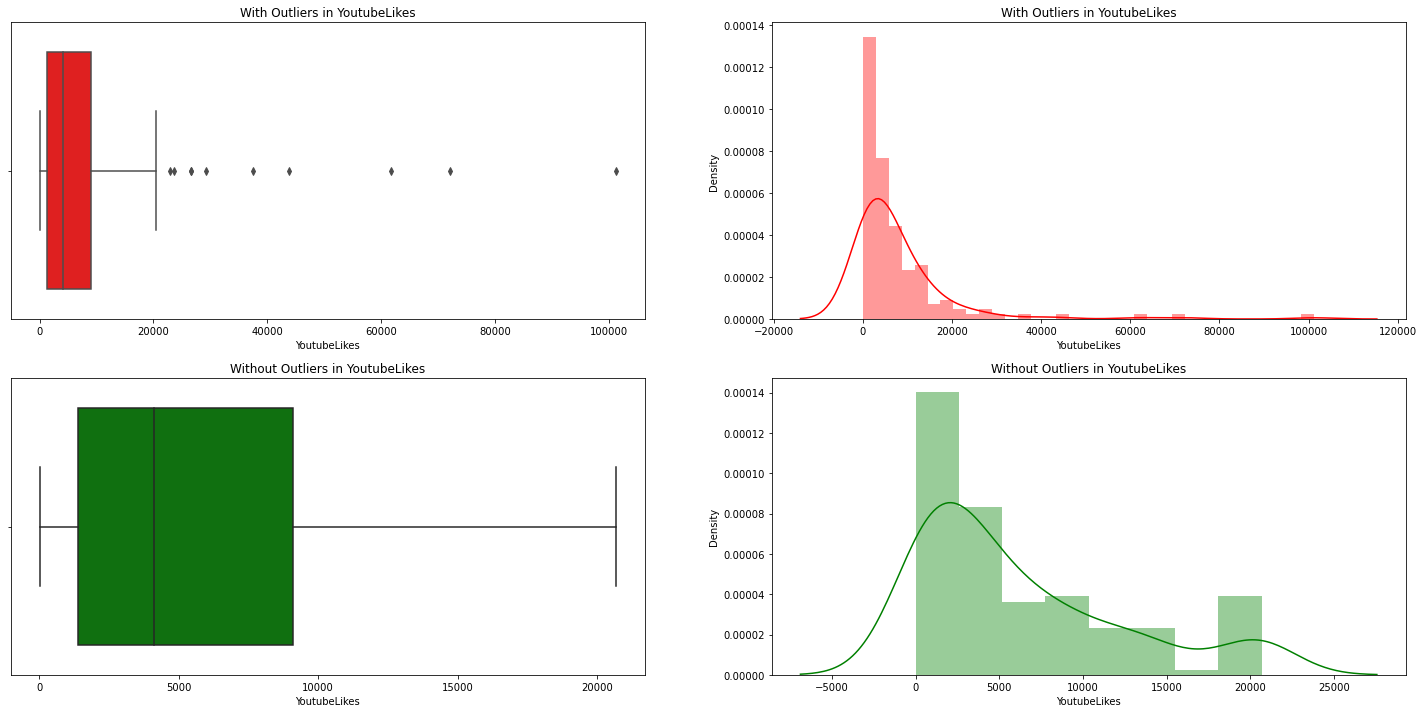

In [53]:
Compare_Before_After_BoxPlot(original_bollwod_data,data,'YoutubeLikes')

#### Find IQR for Youtube Dislikes

In [54]:
IQR_Info_YTD=calculate_IQR75_25IQR_IQR(data,'YoutubeDislikes')

In [55]:
printIQRinfo(IQR_Info_YTD,'YoutubeDislikes')

Percentile_75_YoutubeDislikes: 1419.0
Percentile_25_YoutubeDislikes: 189.0
Percentile_IQR_YoutubeDislikes: 1230.0
UpperLimit_YoutubeDislikes: 3264.0
LowerLimit_YoutubeDislikes: -1656.0


#### Adjustment of Outliers 

In [56]:
capping_Outliers(data,'YoutubeDislikes',IQR_Info_YTD)

#### Comparing the data/data distribustion after adjustment of outlies

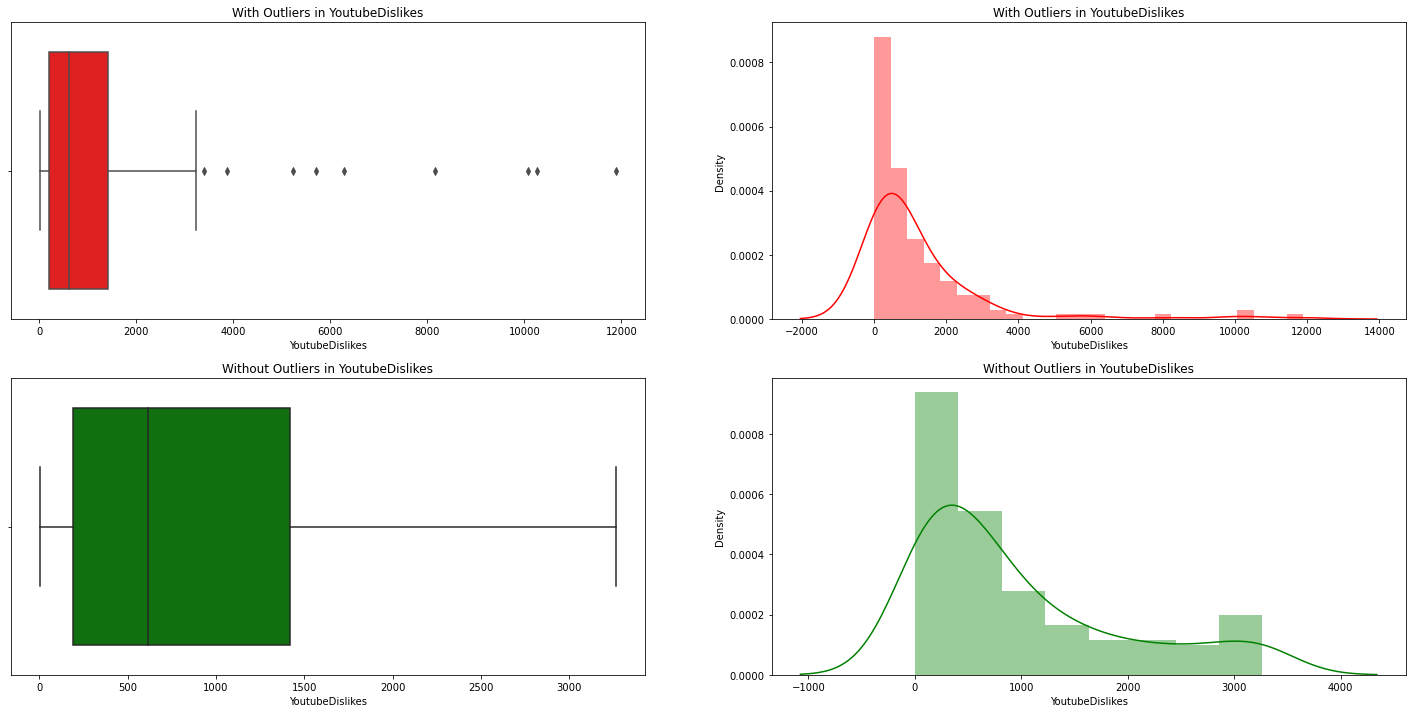

In [57]:
Compare_Before_After_BoxPlot(original_bollwod_data,data,'YoutubeDislikes')

#### We don't have the outliers after adjustment of Outliers

#### let's plot the feature compare the  feature before(with outliers)  and after (no outliers)

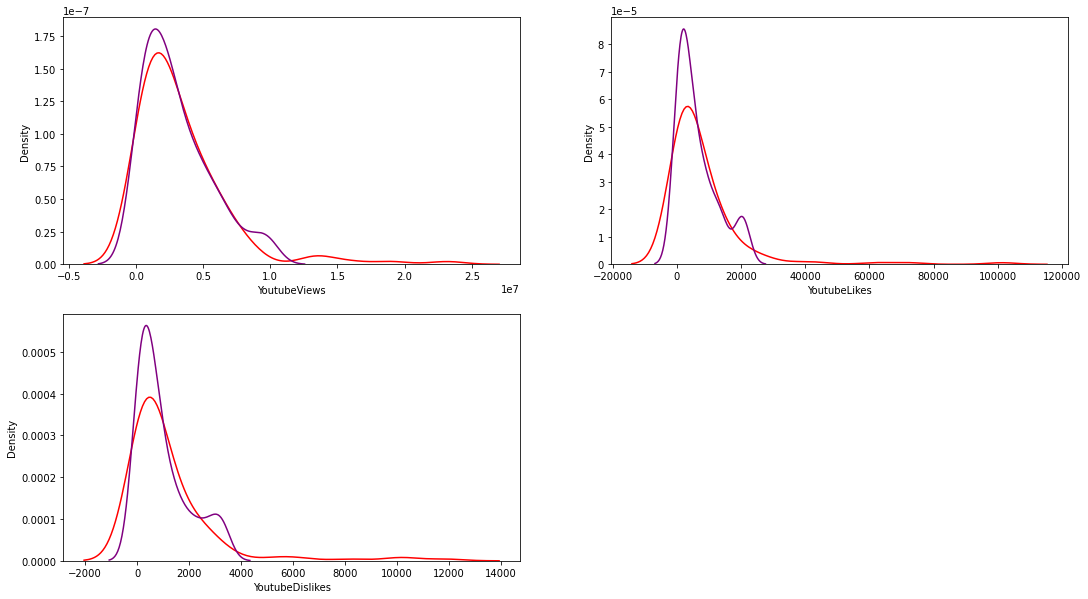

In [58]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.distplot(original_bollwod_data['YoutubeViews'],hist=False,color='red') # Before
sns.distplot(data['YoutubeViews'],hist=False,color='purple') # After


plt.subplot(2,2,2)
sns.distplot(original_bollwod_data['YoutubeLikes'],hist=False,color='red') # Before
sns.distplot(data['YoutubeLikes'],hist=False,color='purple') # After

plt.subplot(2,2,3)
sns.distplot(original_bollwod_data['YoutubeDislikes'],hist=False,color='red') # Before
sns.distplot(data['YoutubeDislikes'],hist=False,color='purple') # After


plt.show()

#### Preparing data for Train the model

In [59]:
new_data_BOC=data.iloc[:,3:-1]

#### Using (ColumnTrasformer) OneHotEncoder to convert string into numbers

In [60]:
transform_BOC = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['ReleaseTime','Genre'])
],remainder='passthrough',verbose_feature_names_out=False)

In [61]:
transform_BOC.fit(new_data_BOC)
transform_BOC.fit_transform(new_data_BOC)

array([[0.0, 1.0, 0.0, ..., 2014, 4, 'Friday'],
       [0.0, 0.0, 1.0, ..., 2013, 1, 'Friday'],
       [0.0, 0.0, 1.0, ..., 2014, 7, 'Friday'],
       ...,
       [0.0, 0.0, 1.0, ..., 2015, 3, 'Friday'],
       [0.0, 0.0, 1.0, ..., 2015, 3, 'Friday'],
       [1.0, 0.0, 0.0, ..., 2014, 5, 'Friday']], dtype=object)

In [62]:
new_data_BOC = pd.DataFrame(transform_BOC.fit_transform(new_data_BOC),columns=transform_BOC.get_feature_names_out())

In [63]:
x_train_BOC,x_test_BOC,y_train_BOC,y_test_BOC = train_test_split(new_data_BOC.drop(columns=['BoxOfficeCollection','Release_year','Release_day']),
                                                new_data_BOC[['BoxOfficeCollection']],
                                                test_size=0.3,
                                                random_state=11)

#### Now Scale the data using Standard Scaler

In [64]:
scaler = StandardScaler()

In [65]:
scaler.fit(x_train_BOC)

StandardScaler()

In [66]:
x_train_scaled_BOC = scaler.fit_transform(x_train_BOC)
x_test_scales_BOC = scaler.transform(x_test_BOC)

In [67]:
x_test_BOC.head()

,ReleaseTime_HS,ReleaseTime_LW,ReleaseTime_N,Genre_Comedy,Genre_Drama,Genre_Romance,Genre_Thriller,Budget,YoutubeViews,YoutubeLikes,YoutubeDislikes,year,Release_month
111,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,462722.0,513.0,77.0,2013,7
75,0.0,0.0,1.0,1.0,0.0,0.0,0.0,50.0,4590539.0,9021.0,1465.0,2014,2
136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0,6132407.0,11241.0,1729.0,2015,1
56,0.0,0.0,1.0,0.0,1.0,0.0,0.0,15.0,4376650.0,14408.0,1035.0,2014,8
110,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0,2543707.0,6390.0,975.0,2014,2


In [68]:
x_train_scaled_BOC = pd.DataFrame(x_train_scaled_BOC,columns=x_train_BOC.columns)
x_test_scales_BOC = pd.DataFrame(x_test_scales_BOC,columns=x_test_BOC.columns)

In [69]:
# Creating object of Linear Regression and Prepare model

In [70]:
lr_scaled_BOC =  LinearRegression()

In [71]:
model_scaled_BOC = lr_scaled_BOC.fit(x_train_scaled_BOC,y_train_BOC)

In [72]:
y_pred_scaled_BOC = model_scaled_BOC.predict(x_test_scales_BOC)

In [73]:
y_test_BOC['BoxOfficeCollection_Pred'] = model_scaled_BOC.predict(x_test_scales_BOC)

In [74]:
# R2 Score
from sklearn.metrics import r2_score
BOC_R2Score = r2_score(y_test_BOC['BoxOfficeCollection'],y_test_BOC['BoxOfficeCollection_Pred'])
print("R2 Score:",BOC_R2Score)
print("R2 Score in % :",BOC_R2Score * 100)

R2 Score: 0.8149762284360145
R2 Score in % : 81.49762284360145


##### Here we got 80.5% score. which represent the strength and same it shows the relelationship between input and ouput features. 
##### from above reference we can say that model understand 80.5% pattern of data

In [75]:
Sq_error_BOC = ( y_test_BOC['BoxOfficeCollection'] - y_test_BOC['BoxOfficeCollection_Pred'])**2

#Find the mean of square error

Error_mean_BOC = Sq_error_BOC.mean()

Error_mean_BOC

# Find the square Root

import math

RMSE_BOC = math.sqrt(Error_mean_BOC)

print("The difference between actual and predicted values RMSE", RMSE_BOC) 

The difference between actual and predicted values RMSE 17.952201926304202


In [76]:
# Lets Calculate the Error

In [77]:
error_BOC = y_test_BOC['BoxOfficeCollection'] - y_test_BOC['BoxOfficeCollection_Pred']


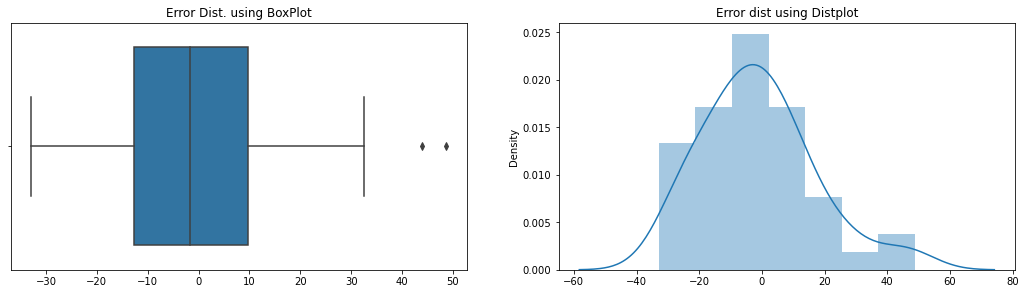

In [78]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.title('Error Dist. using BoxPlot')
sns.boxplot(error_BOC)

plt.subplot(2,2,2)
plt.title('Error dist using Distplot')
sns.distplot(error_BOC)

plt.show()

In [79]:
# From above reference we can say that
  #1.In box plot there is no outliers
  #2.In Dist plot we can say the error are almost normally distributed  

In [80]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test_BOC['BoxOfficeCollection'],y_test_BOC['BoxOfficeCollection_Pred'])

13.895380276402257

In [81]:
mean_squared_error(y_test_BOC['BoxOfficeCollection'],y_test_BOC['BoxOfficeCollection_Pred'])

322.28155400280036